# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
pip install palmerpenguins

In [100]:
from palmerpenguins import load_penguins
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from plotnine import *
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [6]:
penguins = load_penguins()
penguins= penguins.dropna()
penguins.head(1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007


In [5]:
X = penguins.drop('bill_depth_mm', axis=1)
y = penguins['bill_depth_mm']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

## 1. Your best multiple linear regression model from before

In [77]:
ct_combined = ColumnTransformer([
    ('cubed', PolynomialFeatures(degree=3, include_bias=False), ['bill_length_mm']),
    ('standardize', StandardScaler(), ['flipper_length_mm', 'body_mass_g', 'year']),
    ('dummify', OneHotEncoder(sparse=False), ['species', 'island', 'sex'])
], remainder='drop')

In [78]:
my_pipeline_l = Pipeline([("standerdize_cubed",ct_combined),("linear regression",LinearRegression())]).set_output(transform = "pandas")

In [79]:
fitted_l =  my_pipeline_l.fit(X_train, y_train)

In [80]:
y_train_pred = fitted_l.predict(X_train)
y_test_pred = fitted_l.predict(X_test)

In [81]:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

In [82]:
error_df = pd.DataFrame({
    'Model': ['Linear Regression'],
    'Training Error': [train_error],
    'Test Error': [test_error]
})
error_df

,Model,Training Error,Test Error
0,Linear Regression,0.527004,0.884597


## 2. Two kNN models (for different values of K)

### a) First model

In [83]:
my_pipeline_knn = Pipeline([
    ("standerdize_cubed", ct_combined),
    ("knn", KNeighborsRegressor(n_neighbors=1))
])

In [84]:
fitted_knn = my_pipeline_knn.fit(X_train, y_train)

In [85]:
y_knn_pred = fitted_knn.predict(X)

In [86]:
y_train_pred_knn = fitted_knn.predict(X_train)
y_test_pred_knn = fitted_knn.predict(X_test)

In [87]:
train_error_knn = mean_squared_error(y_train, y_train_pred_knn)
test_error_knn = mean_squared_error(y_test, y_test_pred_knn)


In [88]:
error_df_knn = pd.DataFrame({
    'Model': ['kNN with k=1'],
    'Training Error': [train_error_knn],
    'Test Error': [test_error_knn]
})
error_df_knn

,Model,Training Error,Test Error
0,kNN with k=1,0.0,5.283582


In [89]:
error_df = pd.concat([error_df, error_df_knn], ignore_index=True)
error_df

,Model,Training Error,Test Error
0,Linear Regression,0.527004,0.884597
1,kNN with k=1,0.000000,5.283582


### b) Second model

In [90]:
my_pipeline_knn = Pipeline([
    ("standerdize_cubed", ct_combined),
    ("knn", KNeighborsRegressor(n_neighbors=5))
])

In [91]:
fitted_knn = my_pipeline_knn.fit(X_train, y_train)

In [92]:
y_knn_pred = fitted_knn.predict(X)

In [93]:
y_train_pred_knn = fitted_knn.predict(X_train)
y_test_pred_knn = fitted_knn.predict(X_test)

In [94]:
train_error_knn = mean_squared_error(y_train, y_train_pred_knn)
test_error_knn = mean_squared_error(y_test, y_test_pred_knn)


In [101]:
error_df_knn2 = pd.DataFrame({
    'Model': ['kNN with k=5'],
    'Training Error': [train_error_knn],
    'Test Error': [test_error_knn]
})
error_df_knn2

,Model,Training Error,Test Error
0,kNN with k=5,1.936334,3.514967


In [102]:
error_df1 = pd.concat([error_df, error_df_knn2], ignore_index=True)
error_df1

,Model,Training Error,Test Error
0,Linear Regression,0.527004,0.884597
1,kNN with k=1,0.000000,5.283582
2,kNN with k=5,1.936334,3.514967


### Lets try grid testing different values of k

In [137]:
param_grid_knn = {
    'knn__n_neighbors': [1, 3, 5, 7, 10, 30,40]  # Example range of k
}

In [138]:
grid_search_knn = GridSearchCV(my_pipeline_knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error')


In [155]:
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standerdize_cubed',
                                        ColumnTransformer(transformers=[('cubed',
                                                                         PolynomialFeatures(degree=3,
                                                                                            include_bias=False),
                                                                         ['bill_length_mm']),
                                                                        ('standardize',
                                                                         StandardScaler(),
                                                                         ['flipper_length_mm',
                                                                          'body_mass_g',
                                                                          'year']),
                                                                        ('dummify',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['species',
                                                                          'island',
                                                                          'sex'])])),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': [1, 3, 5, 7, 10, 30, 40]},
             scoring='neg_mean_squared_error')

In [140]:
dat1 = pd.DataFrame(param_grid_knn)
mean_test_score_1 = grid_search_knn.cv_results_['mean_test_score']
dat1['scores'] = -mean_test_score_1
sorted_dat1 = pd.DataFrame(dat1).sort_values('scores', ascending=True)
sorted_dat1

,knn__n_neighbors,scores
4,10,2.781928
5,30,2.788668
6,40,2.813562
1,3,2.920387
2,5,2.942602
3,7,3.017026
0,1,3.927241


In [184]:
grid_search2 = GridSearchCV(my_pipeline_knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search2.fit(X_test, y_test)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standerdize_cubed',
                                        ColumnTransformer(transformers=[('cubed',
                                                                         PolynomialFeatures(degree=3,
                                                                                            include_bias=False),
                                                                         ['bill_length_mm']),
                                                                        ('standardize',
                                                                         StandardScaler(),
                                                                         ['flipper_length_mm',
                                                                          'body_mass_g',
                                                                          'year']),
                                                                        ('dummify',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['species',
                                                                          'island',
                                                                          'sex'])])),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': [1, 3, 5, 7, 10, 30, 40]},
             scoring='neg_mean_squared_error')

In [185]:
grid_search3 = GridSearchCV(my_pipeline_knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standerdize_cubed',
                                        ColumnTransformer(transformers=[('cubed',
                                                                         PolynomialFeatures(degree=3,
                                                                                            include_bias=False),
                                                                         ['bill_length_mm']),
                                                                        ('standardize',
                                                                         StandardScaler(),
                                                                         ['flipper_length_mm',
                                                                          'body_mass_g',
                                                                          'year']),
                                                                        ('dummify',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['species',
                                                                          'island',
                                                                          'sex'])])),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': [1, 3, 5, 7, 10, 30, 40]},
             scoring='neg_mean_squared_error')

In [186]:
results2 = grid_search2.cv_results_

In [187]:
results3 = grid_search3.cv_results_

In [189]:
dat_knn = pd.DataFrame({
    'knn__n_neighbors': results2['param_knn__n_neighbors'],  # Adjust the parameter name for kNN
    'mean_train_score': -results3['mean_test_score'],  # Negative because we used 'neg_mean_squared_error'
    'mean_test_score': -results2['mean_test_score']  # Negative because we used 'neg_mean_squared_error'
})

dat_knn

,knn__n_neighbors,mean_train_score,mean_test_score
0,1,3.927241,5.850473
1,3,2.920387,3.061939
2,5,2.942602,2.971571
3,7,3.017026,2.917717
4,10,2.781928,2.772565
5,30,2.788668,3.521288
6,40,2.813562,3.849515


## 3. A decision tree model

min_impurity_decreas function is closest to the alpha value
max_depth how many splits

In [109]:
my_pipeline_dt = Pipeline([
    ("standerdize_cubed", ct_combined),
    ("decision_tree", DecisionTreeRegressor(random_state=42))
])
# descion tree documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [104]:
# Fit the decision tree model on the training data
fitted_dt = my_pipeline_dt.fit(X_train, y_train)

In [105]:
# Predict on the training and test data
y_train_pred_dt = fitted_dt.predict(X_train)
y_test_pred_dt = fitted_dt.predict(X_test)

In [106]:
# Calculate mean squared errors for training and test data
train_error_dt = mean_squared_error(y_train, y_train_pred_dt)
test_error_dt = mean_squared_error(y_test, y_test_pred_dt)

In [107]:

error_df_dt = pd.DataFrame({
    'Model': ['Decision Tree'],
    'Training Error': [train_error_dt],
    'Test Error': [test_error_dt]
})

In [108]:
error_df2 = pd.concat([error_df1, error_df_dt], ignore_index=True)
error_df2

,Model,Training Error,Test Error
0,Linear Regression,0.527004,0.884597
1,kNN with k=1,0.000000,5.283582
2,kNN with k=5,1.936334,3.514967
3,Decision Tree,0.000000,1.441194


In [156]:
param_grid = {
    'decision_tree__max_depth': [1, 3, 4, 5,10,20]
}

In [157]:
grid_search = GridSearchCV(my_pipeline_dt, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standerdize_cubed',
                                        ColumnTransformer(transformers=[('cubed',
                                                                         PolynomialFeatures(degree=3,
                                                                                            include_bias=False),
                                                                         ['bill_length_mm']),
                                                                        ('standardize',
                                                                         StandardScaler(),
                                                                         ['flipper_length_mm',
                                                                          'body_mass_g',
                                                                          'year']),
                                                                        ('dummify',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['species',
                                                                          'island',
                                                                          'sex'])])),
                                       ('decision_tree',
                                        DecisionTreeRegressor(random_state=42))]),
             param_grid={'decision_tree__max_depth': [1, 3, 4, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [161]:
grid_search1 = GridSearchCV(my_pipeline_dt, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search1.fit(X_test, y_test)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standerdize_cubed',
                                        ColumnTransformer(transformers=[('cubed',
                                                                         PolynomialFeatures(degree=3,
                                                                                            include_bias=False),
                                                                         ['bill_length_mm']),
                                                                        ('standardize',
                                                                         StandardScaler(),
                                                                         ['flipper_length_mm',
                                                                          'body_mass_g',
                                                                          'year']),
                                                                        ('dummify',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['species',
                                                                          'island',
                                                                          'sex'])])),
                                       ('decision_tree',
                                        DecisionTreeRegressor(random_state=42))]),
             param_grid={'decision_tree__max_depth': [1, 3, 4, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [163]:
results1 = grid_search1.cv_results_

In [162]:
results = grid_search.cv_results_

In [171]:
dat_1 = pd.DataFrame({
    'decision_tree__max_depth': results['param_decision_tree__max_depth'],
    'mean_train_score': -results1['mean_test_score'],
    'mean_test_score': -results['mean_test_score']
})
dat_1

,decision_tree__max_depth,mean_train_score,mean_test_score
0,1,1.752313,1.175479
1,3,1.378236,0.675967
2,4,1.449041,0.731957
3,5,1.593519,0.838459
4,10,1.752063,1.011900
5,20,1.731780,0.988286


In [125]:
dat = pd.DataFrame(param_grid)
mean_test_score = grid_search.cv_results_['mean_test_score']
dat['scores'] = -mean_test_score
sorted_dat = pd.DataFrame(dat).sort_values('scores', ascending=True)
sorted_dat

,decision_tree__max_depth,scores
1,3,0.675967
2,4,0.731957
3,5,0.838459
5,20,0.988286
4,10,1.011900
0,1,1.175479


## Test vs training error as k increases in KNN

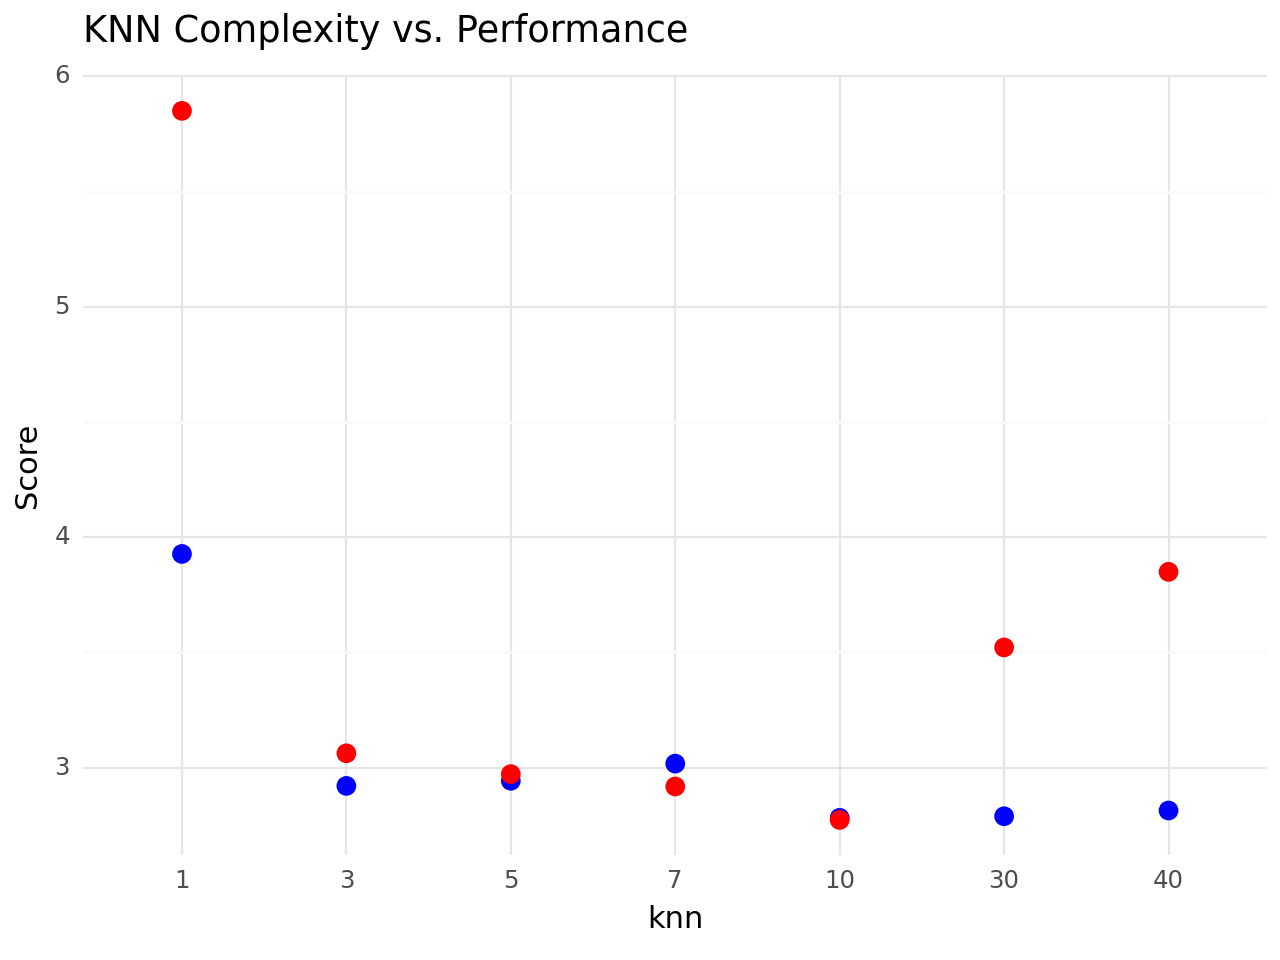

<Figure Size: (640 x 480)>

In [191]:
plot = (
    ggplot(dat_knn)
    + geom_line(aes(x='knn__n_neighbors', y='mean_train_score'), color='blue')
    + geom_line(aes(x='knn__n_neighbors', y='mean_test_score'), color='red')
    + geom_point(aes(x='knn__n_neighbors', y='mean_train_score'), size=3, color='blue')
    + geom_point(aes(x='knn__n_neighbors', y='mean_test_score'), size=3, color='red')
    + labs(x='knn', y='Score', title='KNN Complexity vs. Performance')
    + theme_minimal()
)
plot

The performance of the KNN model improves with increasing k values up to 10, but deteriorates beyond 30, indicating overfitting at lowerk values. This trend suggests that smaller k values fit the training data too closely, failing to generalize well to unseen test data.

## Test vs training error as complexity increases in decision tree

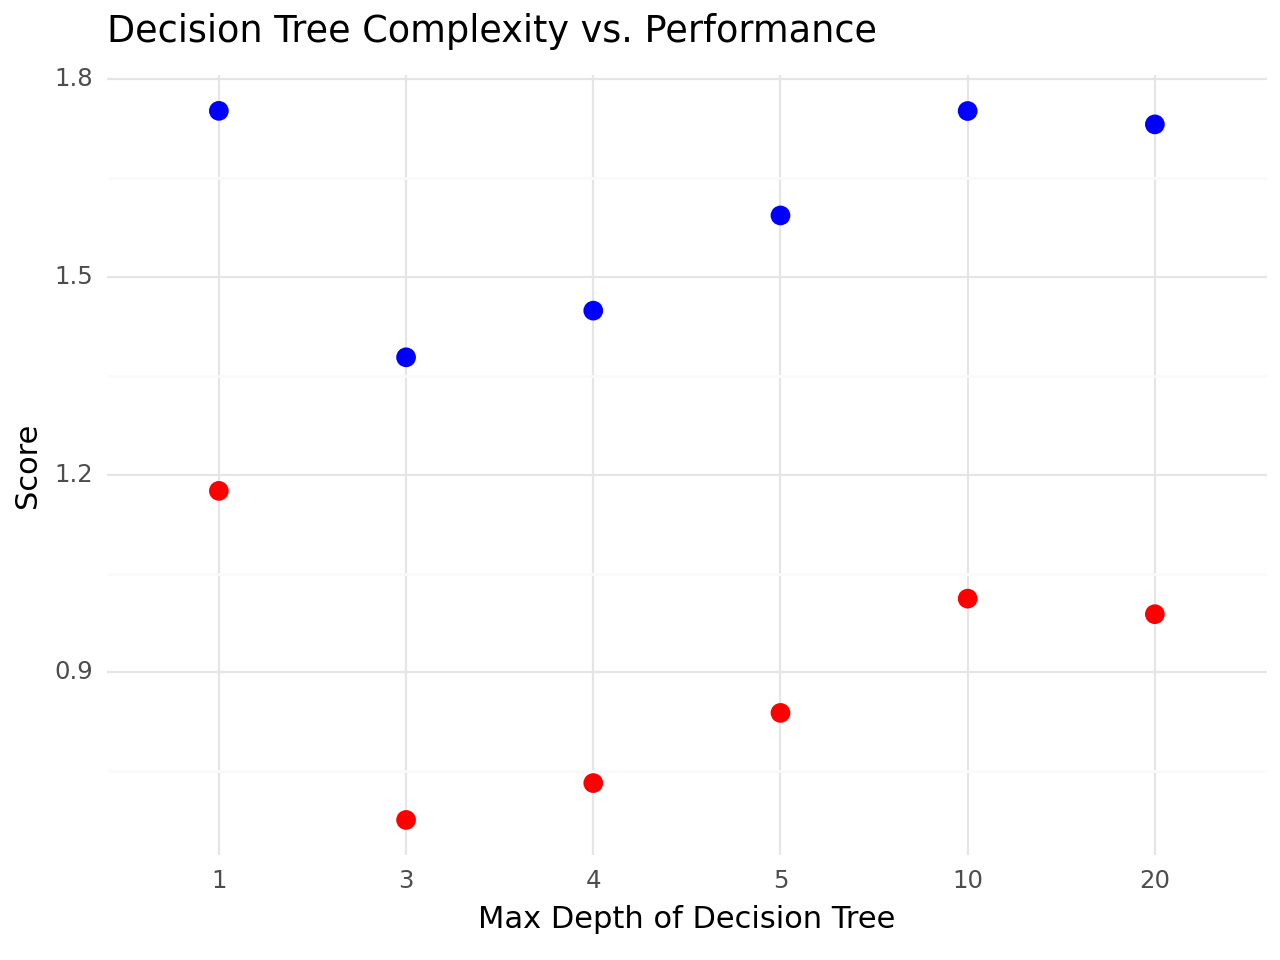

<Figure Size: (640 x 480)>

In [177]:
plot = (
    ggplot(dat_1)
    + geom_line(aes(x='decision_tree__max_depth', y='mean_train_score'), color='blue')
    + geom_line(aes(x='decision_tree__max_depth', y='mean_test_score'), color='red')
    + geom_point(aes(x='decision_tree__max_depth', y='mean_train_score'), size=3, color='blue')
    + geom_point(aes(x='decision_tree__max_depth', y='mean_test_score'), size=3, color='red')
    + labs(x='Max Depth of Decision Tree', y='Score', title='Decision Tree Complexity vs. Performance')
    + theme_minimal()
)
plot

At shallower depths than 3, the tree doesn't have enough branches to capture all the nuances in the data, leading to underfitting where important patterns are missed. However, at depths greater than 3, the tree starts to fit not just to the underlying trends but also to random fluctuations and noise in the training data (overfitting). This makes it less effective at predicting new, unseen examples. So 3 is a good balence for number of branches we should have